# Automatic Crypto Website API Pull

In [6]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'10',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'cadd8907-6e3f-4d4b-8afa-af27de4ceff9',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [12]:
import pandas as pd
pd.set_option('display.max_rows',None)

In [7]:
# This normalizes the data and put it in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11595,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.971980e+07,1.971980e+07,...,53.9313,1.236060e+12,None,2024-07-10T08:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-10 03:11:41.142570
1,1027,Ethereum,ETH,ethereum,9126,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202073e+08,1.202073e+08,...,17.2469,3.719962e+11,None,2024-07-10T08:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-10 03:11:41.142570
2,825,Tether USDt,USDT,tether,91231,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.122598e+11,1.160769e+11,...,5.2117,1.160893e+11,None,2024-07-10T08:09:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-10 03:11:41.142570
3,1839,BNB,BNB,bnb,2190,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475826e+08,1.475826e+08,...,3.5792,7.710444e+10,None,2024-07-10T08:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-10 03:11:41.142570
4,5426,Solana,SOL,solana,699,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.636754e+08,5.798362e+08,...,3.0952,8.338222e+10,None,2024-07-10T08:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-10 03:11:41.142570
5,3408,USDC,USDC,usd-coin,20889,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.401305e+10,3.401305e+10,...,1.5769,3.401290e+10,None,2024-07-10T08:09:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-10 03:11:41.142570
6,52,XRP,XRP,xrp,1351,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.572306e+10,9.998747e+10,...,1.1363,4.392762e+10,None,2024-07-10T08:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-10 03:11:41.142570
7,11419,Toncoin,TON,toncoin,453,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.506203e+09,5.108790e+09,...,0.8585,3.766481e+10,None,2024-07-10T08:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-10 03:11:41.142570
8,74,Dogecoin,DOGE,dogecoin,1021,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.450553e+11,1.450553e+11,...,0.7369,1.587500e+10,None,2024-07-10T08:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-10 03:11:41.142570
9,2010,Cardano,ADA,cardano,1209,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.587210e+10,3.703500e+10,...,0.6367,1.720655e+10,None,2024-07-10T08:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-10 03:11:41.142570


In [14]:
# Fxn that pull API data
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'10',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'cadd8907-6e3f-4d4b-8afa-af27de4ceff9',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    # This normalizes the data and put it in a dataframe

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    #df = pd.concat([df,df2])

    if not os.path.isfile(r'C:\Users\nhanl\Python\Tutorials\Projects\API.csv'):
        df.to_csv(r'C:\Users\nhanl\Python\Tutorials\Projects\API.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\nhanl\Python\Tutorials\Projects\API.csv', mode = 'a', header = False)


In [24]:
import os
from time import time
from time import sleep

for i in range(10):
    api_runner()
    print('API Run Successfully!')
    sleep(60) # sleep for 1 minute
print('API Fully Done!')
exit()


API Run Successfully!
API Run Successfully!
API Run Successfully!
API Run Successfully!
API Run Successfully!
API Run Successfully!
API Run Successfully!


KeyboardInterrupt: 

In [36]:
pd.set_option('display.float_format', lambda x: '%.5f' % x) 
pd.set_option('display.max_columns',None)

In [42]:
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11595,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19719806.00000,19719806.00000,False,NaN,1,NaN,NaN,NaN,2024-07-10T10:59:00.000Z,58625.95799,27324725415.60648,-14.97990,0.17596,2.12109,-2.71413,-15.53779,-3.46914,-16.85063,1156092518045.24048,53.73200,1231145117702.98999,NaN,2024-07-10T10:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-10 06:00:53.930270
1,1,1027,Ethereum,ETH,ethereum,9126,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120207304.75119,120207304.75119,True,NaN,2,NaN,NaN,NaN,2024-07-10T10:58:00.000Z,3101.65966,14032319028.65682,-26.58480,0.38999,0.71084,-6.23443,-15.63550,6.70721,-12.94833,372842148344.90631,17.32920,372842148344.90997,NaN,2024-07-10T10:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-10 06:00:53.930270
2,2,825,Tether USDt,USDT,tether,91250,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,112259808785.14278,116076856616.98984,True,NaN,3,NaN,NaN,NaN,2024-07-10T10:58:00.000Z,1.00012,49153079836.20863,-20.77050,0.01954,0.01245,0.15059,0.04394,0.05577,0.02946,112272865784.97134,5.21810,116090357579.74001,NaN,2024-07-10T10:58:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-10 06:00:53.930270
3,3,1839,BNB,BNB,bnb,2190,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,147582544.65492,147582544.65492,False,NaN,4,NaN,NaN,NaN,2024-07-10T10:58:00.000Z,526.80808,1609901890.72448,-12.73750,0.70845,2.25332,-5.93003,-18.16877,-10.40920,-11.97748,77747676294.48953,3.61350,77747676294.49001,NaN,2024-07-10T10:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-10 06:00:53.930270
4,4,5426,Solana,SOL,solana,699,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,463675050.60789,579835862.83007,True,NaN,5,NaN,NaN,NaN,2024-07-10T10:58:00.000Z,143.71404,2098285949.15954,-34.75740,0.28450,1.69704,-0.31094,-10.10707,-0.33425,-16.61604,66636612649.96959,3.09710,83330551732.97000,NaN,2024-07-10T10:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-10 06:00:53.930270
5,5,3408,USDC,USDC,usd-coin,20893,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,34019657984.27028,34019657984.27028,False,NaN,6,NaN,NaN,NaN,2024-07-10T10:58:00.000Z,1.00011,5334631053.59312,-21.20630,0.02995,0.01598,0.01157,0.01934,0.02373,0.01811,34023254700.51836,1.58140,34023254700.52000,NaN,2024-07-10T10:58:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-10 06:00:53.930270
6,6,52,XRP,XRP,xrp,1351,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,55723063839.00000,99987471767.00000,False,NaN,7,NaN,NaN,NaN,2024-07-10T10:59:00.000Z,0.44200,962038190.85944,-24.80280,0.48541,1.85216,-8.51128,-11.27801,-12.06909,-28.03117,24629483432.18826,1.14470,44199801187.08000,NaN,2024-07-10T10:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-10 06:00:53.930270
7,7,11419,Toncoin,TON,toncoin,454,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,2506208314.53903,5108796485.41097,True,NaN,8,3414166606.00000,25070236455.06017,NaN,2024-07-10T10:58:00.000Z,7.34300,236824466.58017,-22.61710,0.22545,1.23182,-5.99529,3.45675,9.34891,-0.72033,18403095777.66727,0.85530,37513909152.8100

In [40]:
df72 = pd.read_csv(r'C:\Users\nhanl\Python\Tutorials\Projects\API.csv') 
df3 = df72.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.23391,2.22178,-2.63661,-15.47378,-3.32590,-16.76863
Ethereum,0.45853,0.78869,-6.11431,-15.56976,6.84388,-12.87163
Tether USDt,-0.00250,0.00363,0.13238,0.03219,0.03925,0.01762
BNB,0.86012,2.40626,-5.76763,-17.98158,-10.28960,-11.78954
Solana,0.34841,1.83200,0.08235,-9.97934,-0.19225,-16.49643
USDC,0.00468,0.00313,-0.00388,0.00348,0.00139,-0.00109
XRP,0.38484,1.60649,-8.43781,-11.19013,-12.01028,-27.92447
Toncoin,0.31811,1.21808,-5.92403,3.62747,9.78439,-0.45778
Dogecoin,0.26645,0.84813,-9.13522,-24.73949,-23.83024,-44.60169


In [45]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.23391
             quote.USD.percent_change_24h     2.22178
             quote.USD.percent_change_7d     -2.63661
             quote.USD.percent_change_30d   -15.47378
             quote.USD.percent_change_60d    -3.32590
             quote.USD.percent_change_90d   -16.76863
Ethereum     quote.USD.percent_change_1h      0.45853
             quote.USD.percent_change_24h     0.78869
             quote.USD.percent_change_7d     -6.11431
             quote.USD.percent_change_30d   -15.56976
             quote.USD.percent_change_60d     6.84388
             quote.USD.percent_change_90d   -12.87163
Tether USDt  quote.USD.percent_change_1h     -0.00250
             quote.USD.percent_change_24h     0.00363
             quote.USD.percent_change_7d      0.13238
             quote.USD.percent_change_30d     0.03219
             quote.USD.percent_change_60d     0.03925
             quote.USD.percent_change_90

In [49]:
# df4 is a Series, df3 is a DataFrame
# changing df4 to a DataFrame
df5 = df4.to_frame(name = 'values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.23391
            quote.USD.percent_change_24h   2.22178
            quote.USD.percent_change_7d   -2.63661
            quote.USD.percent_change_30d -15.47378
            quote.USD.percent_change_60d  -3.32590
            quote.USD.percent_change_90d -16.76863
Ethereum    quote.USD.percent_change_1h    0.45853
            quote.USD.percent_change_24h   0.78869
            quote.USD.percent_change_7d   -6.11431
            quote.USD.percent_change_30d -15.56976
            quote.USD.percent_change_60d   6.84388
            quote.USD.percent_change_90d -12.87163
Tether USDt quote.USD.percent_change_1h   -0.00250
            quote.USD.percent_change_24h   0.00363
            quote.USD.percent_change_7d    0.13238
            quote.USD.percent_change_30d   0.03219
            quote.USD.percent_change_60d   0.03925
            quote.USD.percent_change_90d   0.01762
BNB         quote.USD.percent_change_1h    0.86012
            quote.USD.percent_change_24h   2.40626
            quote.USD.percent_change_7d   -5.76763
            quote.USD.percent_change_30d -17.98158
            quote.USD.percent_change_60d -10.28960
            quote.USD.percent_change_90d -11.78954
Solana      quote.USD.percent_change_1h    0.34841
            quote.USD.percent_change_24h   1.83200
            quote.USD.percent_change_7d    0.08235
            quote.USD.percent_change_30d  -9.97934
            quote.USD.percent_change_60d  -0.19225
            quote.USD.percent_change_90d -16.49643
USDC        quote.USD.percent_change_1h    0.00468
            quote.USD.percent_change_24h   0.00313
            quote.USD.percent_change_7d   -0.00388
            quote.USD.percent_change_30d   0.00348
            quote.USD.percent_change_60d   0.00139
            quote.USD.percent_change_90d  -0.00109
XRP         quote.USD.percent_change_1h    0.38484
            quote.USD.percent_change_24h   1.60649
            quote.USD.percent_change_7d   -8.43781
            quote.USD.percent_change_30d -11.19013
            quote.USD.percent_change_60d -12.01028
            quote.USD.percent_change_90d -27.92447
Toncoin     quote.USD.percent_change_1h    0.31811
            quote.USD.percent_change_24h   1.21808
            quote.USD.percent_change_7d   -5.92403
            quote.USD.percent_change_30d   3.62747
            quote.USD.percent_change_60d   9.78439
            quote.USD.percent_change_90d  -0.45778
Dogecoin    quote.USD.percent_change_1h    0.26645
            quote.USD.percent_change_24h   0.84813
            quote.USD.percent_change_7d   -9.13522
            quote.USD.percent_change_30d -24.73949
            quote.USD.percent_change_60d -23.83024
            quote.USD.percent_change_90d -44.60169
Cardano     quote.USD.percent_change_1h   -0.18570
            quote.USD.percent_change_24h   2.92498
            quote.USD.percent_change_7d   -5.66843
            quote.USD.percent_change_30d -14.18246
            quote.USD.percent_change_60d -13.40645
            quote.USD.percent_change_90d -34.65531

In [51]:
df5.count()

values    60
dtype: int64

In [57]:
index = pd.Index(range(60))

df5.set_index(index)
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.23391
1,Bitcoin,quote.USD.percent_change_24h,2.22178
2,Bitcoin,quote.USD.percent_change_7d,-2.63661
3,Bitcoin,quote.USD.percent_change_30d,-15.47378
4,Bitcoin,quote.USD.percent_change_60d,-3.32590
5,Bitcoin,quote.USD.percent_change_90d,-16.76863
6,Ethereum,quote.USD.percent_change_1h,0.45853
7,Ethereum,quote.USD.percent_change_24h,0.78869
8,Ethereum,quote.USD.percent_change_7d,-6.11431
9,Ethereum,quote.USD.percent_change_30d,-15.56976


In [69]:
df6 = df6.rename(columns = {'level_1' : 'percent_change'})

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.23391
1,Bitcoin,quote.USD.percent_change_24h,2.22178
2,Bitcoin,quote.USD.percent_change_7d,-2.63661
3,Bitcoin,quote.USD.percent_change_30d,-15.47378
4,Bitcoin,quote.USD.percent_change_60d,-3.32590
5,Bitcoin,quote.USD.percent_change_90d,-16.76863
6,Ethereum,quote.USD.percent_change_1h,0.45853
7,Ethereum,quote.USD.percent_change_24h,0.78869
8,Ethereum,quote.USD.percent_change_7d,-6.11431
9,Ethereum,quote.USD.percent_change_30d,-15.56976


In [79]:
df6['percent_change'] = df6['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d' ],['1h','24h','7d','30d', '60d','90d'])

In [81]:
df6

,name,percent_change,values
0,Bitcoin,1h,0.23391
1,Bitcoin,24h,2.22178
2,Bitcoin,7d,-2.63661
3,Bitcoin,30d,-15.47378
4,Bitcoin,60d,-3.32590
5,Bitcoin,90d,-16.76863
6,Ethereum,1h,0.45853
7,Ethereum,24h,0.78869
8,Ethereum,7d,-6.11431
9,Ethereum,30d,-15.56976


In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

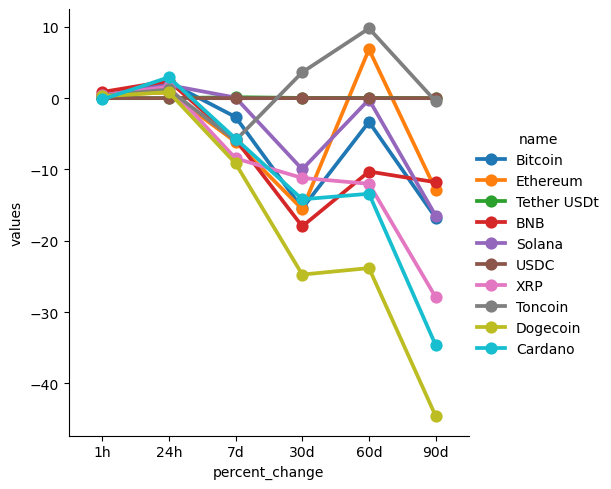

In [83]:
sns.catplot(x = 'percent_change',y = 'values', hue = 'name', data = df6, kind = 'point')

In [93]:
df7 = df72[['name', 'quote.USD.price','timestamp']]
df7 = df7.query("name == 'Bitcoin'")
df7

,name,quote.USD.price,timestamp
0,Bitcoin,58625.95799,2024-07-10 06:00:53.930270
10,Bitcoin,58653.30711,2024-07-10 06:01:54.870417
20,Bitcoin,58674.69596,2024-07-10 06:05:43.044877
30,Bitcoin,58652.92621,2024-07-10 06:06:43.911589
40,Bitcoin,58644.47454,2024-07-10 06:07:44.759634
50,Bitcoin,58644.32820,2024-07-10 06:08:46.839652
60,Bitcoin,58655.57135,2024-07-10 06:09:47.706635
70,Bitcoin,58671.75516,2024-07-10 06:10:48.692884
80,Bitcoin,58671.20717,2024-07-10 06:11:49.554413


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

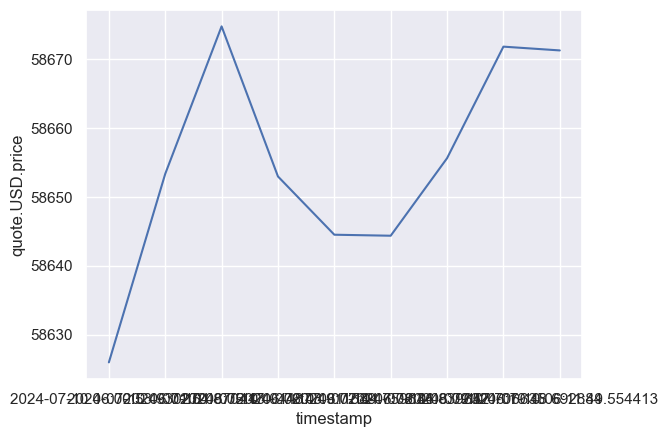

In [97]:
sns.set_theme(style = 'darkgrid')

sns.lineplot(x = 'timestamp', y = 'quote.USD.price', data = df7)